<a href="https://colab.research.google.com/github/sswayansidha/ML_Models/blob/main/Implementation/P1_Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Objective : Implementation of linear regression - 2 variables**
With given height(in inch) predict weight(in Pound)

Dataset Link: https://www.kaggle.com/mustafaali96/weight-height?select=weight-height.csv

In [1]:
from google.colab import files
uploaded = files.upload()

Saving weight-height.csv to weight-height.csv


In [14]:
import pandas as pd
import io
df = pd.read_csv(io.BytesIO(uploaded["weight-height.csv"]))

In [15]:
df.tail() # Dataset Review

,Gender,Height,Weight
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461
9999,Female,61.944246,113.649103


In [16]:
df = df[df['Gender']=='Male'] # Keeping only Male Gender in dataset

In [18]:
df.tail() # Dataset Review

,Gender,Height,Weight
4995,Male,68.860062,177.131052
4996,Male,68.973423,159.285228
4997,Male,67.013795,199.195400
4998,Male,71.557718,185.905909
4999,Male,70.351880,198.903012


In [19]:
df = df.drop('Gender', 1) # Deleting Gender Column from dataframe

In [21]:
df.tail()

,Height,Weight
4995,68.860062,177.131052
4996,68.973423,159.285228
4997,67.013795,199.195400
4998,71.557718,185.905909
4999,70.351880,198.903012


In [22]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [23]:
x.tail() # x review

,Height
4995,68.860062
4996,68.973423
4997,67.013795
4998,71.557718
4999,70.351880


In [24]:
y.tail() # y review

4995    177.131052
4996    159.285228
4997    199.195400
4998    185.905909
4999    198.903012
Name: Weight, dtype: float64

In [25]:
# Doing a train test split with 20-80 ratio
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=7)

In [30]:
from sklearn.linear_model import LinearRegression # importing Linear Regression
model = LinearRegression() # Model Initialization
model.fit(x_train,y_train) # Fit model to train data

LinearRegression()

In [31]:
prediction = model.predict(x_test) # Predict x_test data

In [33]:
# Performance analysis by R Square
from sklearn.metrics import r2_score
print(r2_score(y_test,prediction))

0.74301422363317


#**Graphical Representation of data**

In [34]:
df.describe() #data description

,Height,Weight
count,5000.000000,5000.000000
mean,69.026346,187.020621
std,2.863362,19.781155
min,58.406905,112.902939
25%,67.174679,173.887767
50%,69.027709,187.033546
75%,70.988744,200.357802
max,78.998742,269.989699


**Plot full data**

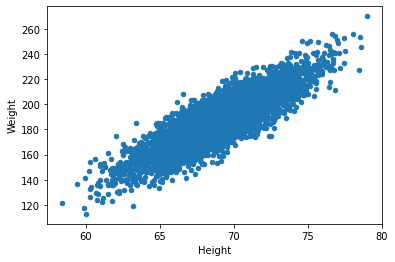

In [37]:
df.plot(kind='scatter',x="Height",y="Weight")

**Plot train data**

In [39]:
#Plot only train data
x_train_list = list(x_train['Height'])
y_train_list = list(y_train)

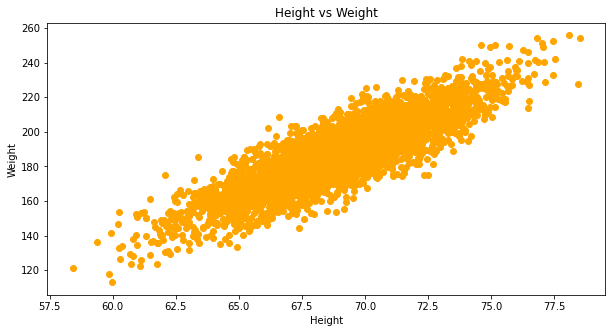

In [43]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5))
plt.scatter(x_train_list,y_train_list,color='orange')
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Height vs Weight")
plt.show()

**Plot train data with regression line**

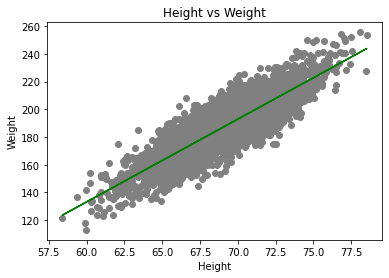

In [48]:
plt.scatter(x_train, y_train, color = "gray")
plt.plot(x_train, model.predict(x_train), color = "green")
plt.title("Height vs Weight")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

**Plot test vs Prediction data**

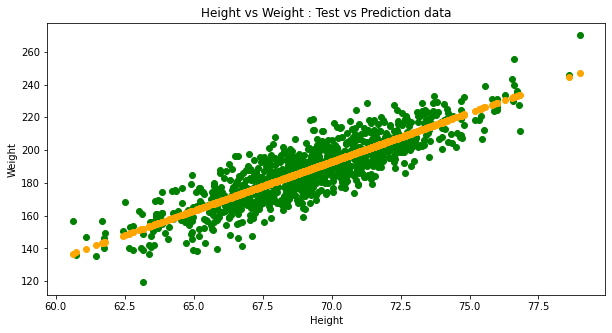

In [51]:
x_test_list = list(x_test['Height'])
y_test_list = list(y_test)
fig = plt.figure(figsize=(10,5))
plt.scatter(x_test_list,y_test_list,color='green')
plt.scatter(x_test_list,prediction,color='orange')
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Height vs Weight : Test vs Prediction data")
plt.show()

#**Taking User input(Height) and Predict weight**

In [71]:
print("Enter your height in inch:")
height = input()
data = {'Height': [height]}
df1 = pd.DataFrame(data)
weight = model.predict(df1)
weight = weight[0]
print("Weight is {} pounds".format(round(weight,2)))

Enter your height in inch:
66
Weight is 168.99 pounds


#**The End - Happy coding**